[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI342-F1/Lab-Tutoral/blob/main/AI342Lab1.ipynb)

# Lab 1: Introduction to Digital Images and Image Processing with Python
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS
---
### Learning Objectives:
* Represent a digital image as a numerical array.
* Understand pixels, spatial resolution, and grey level intensity.
* Load, display, and inspect images in Python.
* Apply simple low-level image processing operations.
* Relate practical operations to the image processing pipeline introduced in Chapter 1

## 1. Environment Setup

In [14]:
# write your code here

#Required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
#Optional but recommended later in the course: 
import cv2

## 2. What is a digital image in practice?
In the lecture, a digital image is defined as a two dimensional function $f(x,y)$ where the value at each coordinate represents intensity. In practice, this function is stored as a matrix of numbers.

##**Exercise 2.1: Create a synthetic image**


In [15]:
# Task: Create an 8x8 black image (matrix of zeros)
# Hint: Use np.zeros((rows, cols))
image = np.zeros((8, 8)) 
image[3, 3] = 255 
image[4, 4] = 128
print(image)

# --- Discussion Questions ---
# 1. What is the spatial resolution of this image? 8*8
# 2. What does each value represent? 0.0 or Intensity

[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 255.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 128.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


##**Exercise 2.2: Visualise the image**

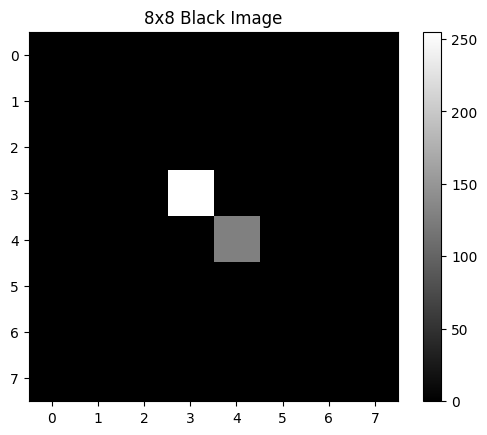

In [16]:
# write your code here
plt.imshow(image, cmap='gray', vmin=0, vmax=255) 
plt.title("8x8 Black Image") 
plt.colorbar() 
plt.show()
# Task: Change some pixels to 255 (White) and re-visualize
# image[row, col] = 255
# WRITE YOUR CODE HERE:

## 3. Pixels and intensity values
Pixels are the smallest units of a digital image and hold quantised intensity values, as discussed in the slides on pixels and digitisation
## **Exercise 3.1: Modify individual pixels**


In [17]:
# write your code here
image[3, 3] = 255 
image[4, 4] = 128
print(image) 

#Questions
#1.	Which pixel is brighter and why?
#2.	How does quantisation affect visual appearance?


[[  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0. 255.   0.   0.   0.   0.]
 [  0.   0.   0.   0. 128.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


## 4. Grey scale images
The course focuses primarily on grey scale images with one sample per pixel.
## **Exercise 4.1: Generate a gradient image**


[[255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]
 ...
 [255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]
 [255. 254. 253. ...   2.   1.   0.]]
float64


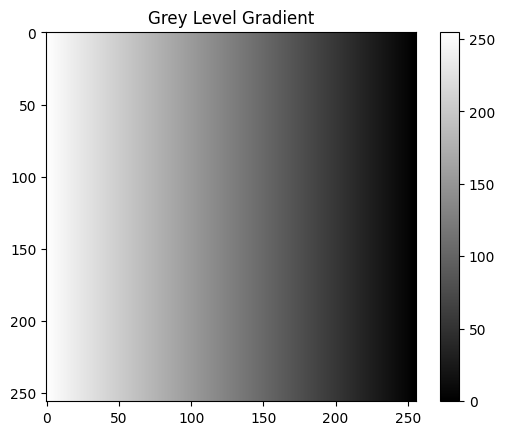

In [18]:
# write your code here
gradient = np.tile(np.linspace(255, 0, 256), (256, 1)) 
print(gradient)
print(gradient.dtype)
plt.imshow(gradient, cmap='gray') 
plt.title("Grey Level Gradient") 
plt.colorbar() 
plt.show() 

#Questions
#1.	How many grey levels are visible?
#2.	What data type is used to store the pixel values?


## 5. Image acquisition and representation
Image acquisition converts a physical scene into a digital image. In Python, loading an image is equivalent to acquiring an already digitised scene.
## **Exercise 5.1: Load and inspect an image**

(800, 800, 3)
uint8


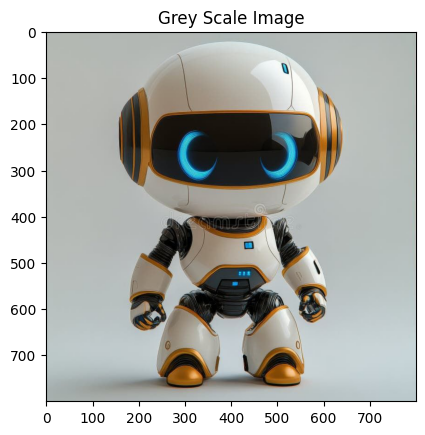

In [19]:
# write your code here
from matplotlib.image import imread 
 
image = imread('prof2.jpg') 
print(image.shape) 
print(image.dtype) 
 
plt.imshow(image) 
plt.title("Grey Scale Image") 
plt.show() 

## 6. Low level image processing: image in, image out
Low level processing improves visual quality without extracting semantic meaning, as described in the lecture pipeline
## **Exercise 6.1: Image enhancement by contrast stretching**

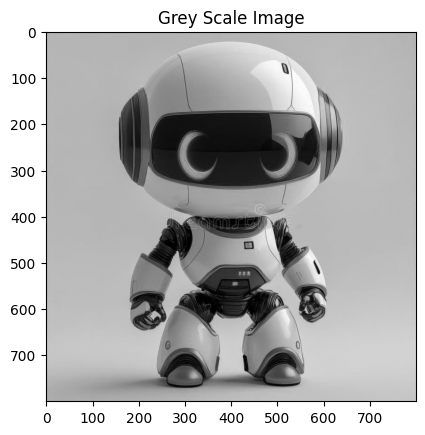

In [20]:
# write your code here
gray = image.mean(axis=2) 
 
plt.imshow(gray, cmap='gray') 
plt.title("Grey Scale Image") 
plt.show() 

#Questions
#1.	Which image has better visibility of details?
#2.	Is this enhancement subjective or objective?


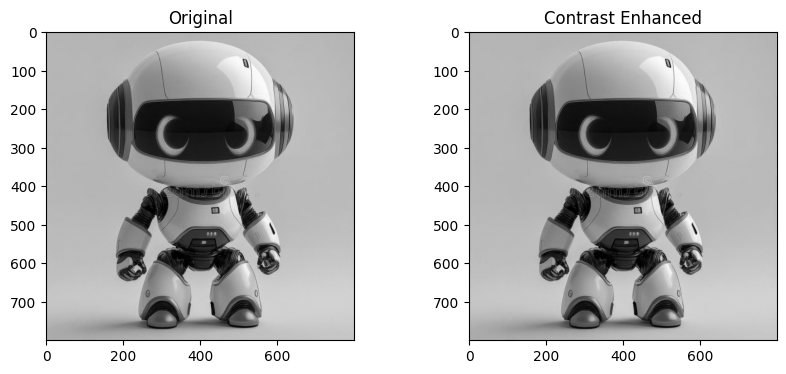

In [21]:
min_val = gray.min() 
max_val = gray.max() 
 
enhanced = (gray - min_val) / (max_val - min_val) * 255 
 
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.imshow(gray, cmap='gray') 
plt.title("Original") 
 
plt.subplot(1,2,2) 
plt.imshow(enhanced, cmap='gray') 
 
plt.title("Contrast Enhanced") 
plt.show() 

## 7. Noise and image restoration
Noise removal is a core example of low level processing.

## **Exercise 7.1: Add artificial noise**

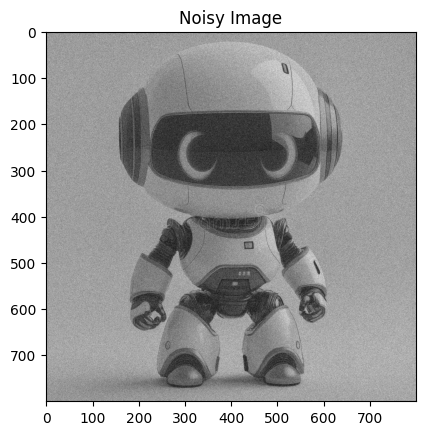

In [22]:
# write your code here
noise = np.random.normal(0, 20, gray.shape) 
noisy = gray + noise
 
plt.imshow(noisy, cmap='gray') 
plt.title("Noisy Image") 
plt.show() 

## **Exercise 7.2: Simple smoothing filter**

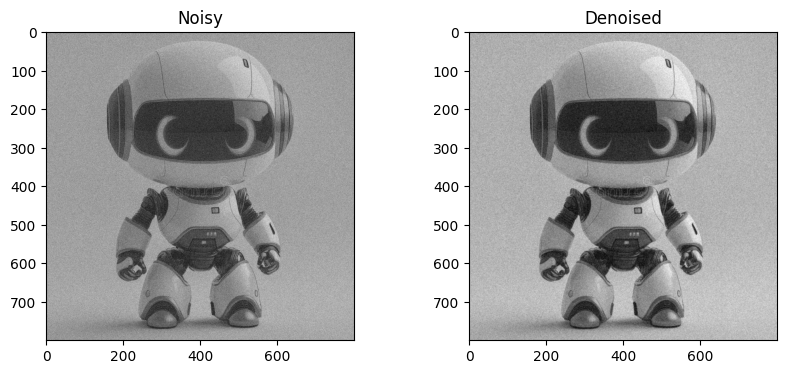

In [23]:
def mean_filter(img, k=2): #كل ما قللناه كل ما كان اعادة التوزيع بشكل اقوى
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

# complete the code here
denoised = mean_filter(noisy) 
 
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.imshow(noisy, cmap='gray') 
plt.title("Noisy") 
 
plt.subplot(1,2,2) 
plt.imshow(denoised, cmap='gray') 
plt.title("Denoised") 
plt.show()

## 8. From image processing to image analysis
The lecture distinguishes between low, mid, and high level processing.
## **Exercise 8.1: Simple threshold segmentation**

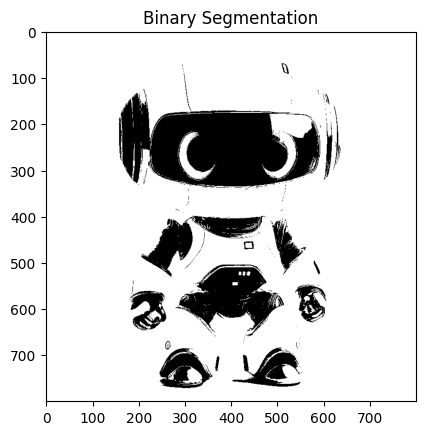

In [24]:
## write your code here
threshold = gray.mean() - 70
binary = gray > threshold 
 
plt.imshow(binary, cmap='gray') 
plt.title("Binary Segmentation") 
plt.show()

# Discussion:
# 1. Is this segmentation reliable?
# 2. What information is lost when converting to binary?

# **9. Mini project: connecting theory to practice**

**Task**

Using only NumPy and Matplotlib:

1.	Create a synthetic image containing at least two objects

2.	Add noise to the image

3.	Apply enhancement and denoising

4.	Segment the objects using a threshold

**Deliverables**

•	Code

•	Output images

•	Short explanation mapping each step to the image processing stages shown in the Chapter 1 pipeline diagram


***Note: Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots***

# Lab1 Mini project

**Name: Fawziah Alnathif**

**SID: 4455981**

**Siction: F2**

**Task**

**1.	Create a synthetic image containing at least two objects**

**Task 1 explanation**

Initially, I created the image at a size of 10x10 and recolored certain areas systematically to draw more than two objects.

This step is similar to the image acquisition step to the image processing stages.

[[160. 240. 240.   0.   0.   0. 255.   0.   0.   0.]
 [240. 240.   0.   0.   0. 255.   0.   0.   0.   0.]
 [240.   0.   0. 255.   0.   0.   0.   0.   0.   0.]
 [  0.   0. 255.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0. 255.   0.   0.   0. 100. 100.   0.   0.   0.]
 [255.   0.   0.   0.   0. 100. 200.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0. 100.   0.   0.]
 [  0.   0. 255. 120.   0.   0.   0.   0. 100.   0.]
 [  0.   0. 120. 255.   0.   0.   0.   0.   0.   0.]]


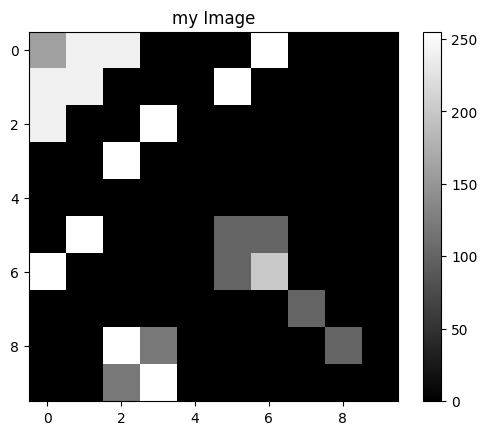

In [26]:
myimage = np.zeros((10, 10)) 
myimage[0, 0] = 160 
myimage[0, 1] = 240
myimage[1, 0] = 240
myimage[1, 1] = 240
myimage[0, 2] = 240
myimage[2, 0] = 240

myimage[5, 5] = 100 
myimage[5, 6] = 100
myimage[6, 5] = 100
myimage[6, 6] = 200
myimage[7, 7] = 100
myimage[8, 8] = 100

myimage[0, 6] = 255
myimage[1, 5] = 255
myimage[2, 3] = 255
myimage[3, 2] = 255
myimage[5, 1] = 255
myimage[6, 0] = 255

myimage[9, 2] = 120
myimage[9, 3] = 255
myimage[8, 2] = 255
myimage[8, 3] = 120

print(myimage)

plt.imshow(myimage, cmap='gray', vmin=0, vmax=255) 
plt.title("my Image") 
plt.colorbar() 
plt.show()

**2.	Add noise to the image**

**Task 2 explanation**

Next, I added a blur layer to the image using the np.random.normal function 
to test the image restoration step to the image processing stages.

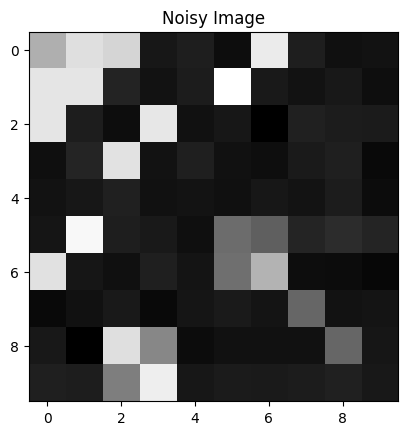

In [4]:
addnoise = np.random.normal(0, 10, myimage.shape) 
noisyimg = myimage + addnoise
 
plt.imshow(noisyimg, cmap='gray') 
plt.title("Noisy Image") 
plt.show() 

**3.	Apply enhancement and denoising**

**Task 3 explanation**

Thirdly, using the `mymean_filter(img, k=1)` function, I redistributed the image intensity to improve and clarify it.

Since I used mathematics in image restoration, this step is the restoration step of the image processing stages.

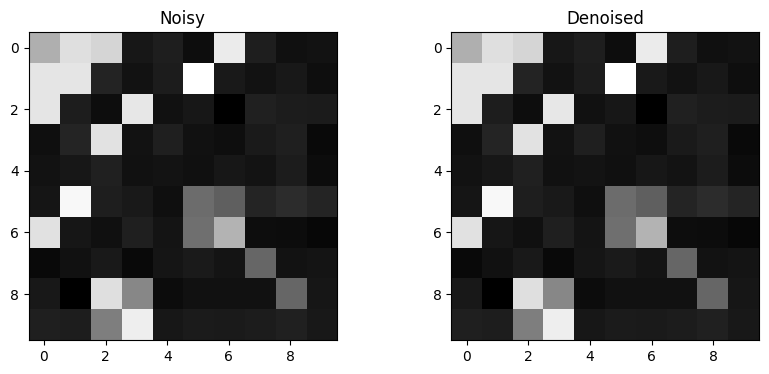

In [32]:
def mymean_filter(img, k=1):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

mydenoised = mymean_filter(noisyimg) 
 
plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1) 
plt.imshow(noisyimg, cmap='gray') 
plt.title("Noisy") 
 
plt.subplot(1,2,2) 
plt.imshow(mydenoised, cmap='gray') 
plt.title("Denoised") 
plt.show()

**4.	Segment the objects using a threshold**

**Task 4 explanation**

Finally, I set a threshold value to control the range of colors displayed.

This is part of the Color Image Processing step for DIP stages.

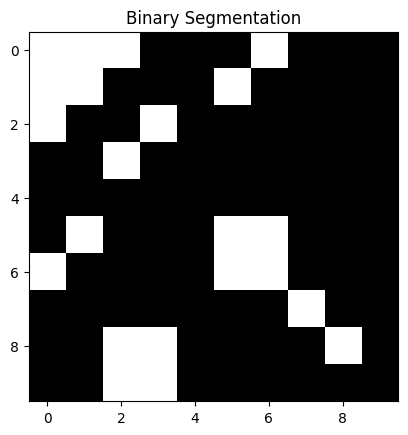

In [6]:
threshold = myimage.mean() + 30
mybinary = myimage > threshold 
 
plt.imshow(mybinary, cmap='gray') 
plt.title("Binary Segmentation") 
plt.show()